<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/22_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 22: Meteorite Landings - DataFrame Slicing

### Teacher-Student Activities

In the previous class, we learnt how to create a boxplot. In this class, we will continue from there. Today, we will learn how to slice a Pandas DataFrame to retrieve a specific set of rows and columns. This process is called slicing. In general, the term slicing means retrieving a specific portion of a dataset.

Let's rush through the activities that we did in the previous class and begin this class from the **Activities 1: Slicing A DataFrame** section.

---

#### The Data

The dataset contains the following variables:

1. `name`: the name of the place where a meteorite was found or observed.

2. `id`: a unique identifier for a meteorite.

3. `nametype`: one of the following:
    
    - `valid`: a typical meteorite.
    
    - `relict`: a meteorite that has been highly degraded by the weather on Earth.

4. `recclass`: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics.

5. `mass:` the mass of the meteorite, in grams

6. `fall`: whether the meteorite was seen falling, or was discovered after its impact; one of the following:

    - `Fell`: the meteorite's fall was observed.
    
    - `Found`: the meteorite's fall was not observed.

7. `year`: the year the meteorite fell, or the year it was found (depending on the value of fell).

8. `reclat`: the latitude of the meteorite's landing.

9. `reclong`: the longitude of the meteorite's landing.

10. `GeoLocation`: a parentheses-enclose, comma-separated tuple that combines reclat and reclong.


---

#### Notes On Missing Or Incorrect Data Points

1. The column names such as `recclass`, `reclat`, `reclong` begin with the `rec` (denotes 'recommended') keyword. They are the recommended values of the classes, latitudes and longitudes variables for the meteorites according to the Meteoritical Society.

2. Remove any year less than `860` or greater than `2016` from the dataset.

3. Remove the `0N/0E` latitude and longitude entries.

---

#### Loading The Dataset

Dataset Link (don't click on it):

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


In [ ]:
# Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')
met_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


---

#### Tuples


In [ ]:
# Number of rows in the 'met_df' DataFrame.
print("Number of rows =", met_df.shape[0])

# Number of columns in the 'met_df' DataFrame.
print("Number of columns =", met_df.shape[1])

Number of rows = 45716
Number of columns = 10


---

#### The `describe()` Function


In [ ]:
# Descriptive statistics for the 'year' values in the 'met_df' DataFrame.
met_df['year'].describe()

count    45428.000000
mean      1991.772189
std         27.181247
min        301.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2501.000000
Name: year, dtype: float64

---

#### The Boxplot

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/boxplot_description.png' width='800'>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


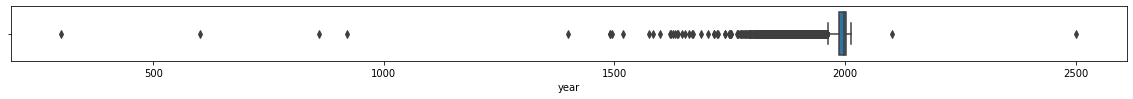

In [ ]:
# Boxplot for the 'pd_series'.
import seaborn as sns # 'sns' is an alias for 'seaborn'.

plt.figure(figsize=(20, 1))
sns.boxplot(met_df['year'])
plt.show()

---

#### Activity 1: Slicing A DataFrame

Our next task is to remove all the rows having the year values greater than `2016` and lesser than `860`. To do this exercise, we will write a condition inside the square brackets after writing the variable containing the DataFrame.

**Syntax:** `data_frame[some_condition]`

To learn this concept, let's retrieve all the rows containing the `year` values less than or equal to `2016`.



In [ ]:
# Teacher Action: Retrieve all the rows from the 'met_df' DataFrame containing the year values less than or equal to 2016.
met_df[met_df['year']<=2016]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


Because of the condition `met_df['year'] <= 2016`, the `met_df` DataFrame will return only those rows in which the year values are less than or equal to `2016`.

At the bottom of the DataFrame, you can see that there are 45,426 rows having the `year` values less than or equal to `2016`. Now, you try to retrieve all the rows having the `year` value greater than or equal to `860` using the same process.

In [ ]:
met_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
met_df[met_df['nametype']=='Relict']

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
5182,Brunflo,5157,Relict,Relict H,NaN,Found,1980.0,63.11667,14.28333,"(63.116670, 14.283330)"
6810,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.7,Found,1992.0,-75.31667,162.00000,"(-75.316670, 162.000000)"
12627,Gove,52859,Relict,Relict iron,0.0,Found,1979.0,-12.26333,136.83833,"(-12.263330, 136.838330)"
15944,Gullhögen 001,44889,Relict,Relict OC,NaN,Found,2000.0,58.38333,13.80000,"(58.383330, 13.800000)"
17739,LaPaz Icefield 031037,35780,Relict,Fusion crust,0.1,Found,2003.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
31072,Österplana 060,56159,Relict,Relict OC,0.0,Found,2009.0,58.58333,13.43333,"(58.583330, 13.433330)"
31073,Österplana 061,56160,Relict,Relict OC,0.0,Found,2009.0,58.58333,13.43333,"(58.583330, 13.433330)"
31074,Österplana 062,56161,Relict,Relict OC,0.0,Found,2010.0,58.58333,13.43333,"(58.583330, 13.433330)"
31075,Österplana 063,56162,Relict,Relict OC,0.0,Found,2010.0,58.58333,13.43333,"(58.583330, 13.433330)"


In [ ]:
# Student Action: Retrieve all the rows having the year values greater than or equal to 860.
met_df[met_df['year']>=860]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


Because of the condition `met_df['year'] >= 860`, the `met_df` DataFrame will return only those rows in which the year values are greater than or equal to `860`.


So, there are also 45,426 rows having the `year` values greater than or equal to `2016`.

---

#### Activity 2: The Ampersand (`&`) Logical Operator^^

Now, let's retrieve all the rows having the `year` values greater than or equal to `860` and less than or equal to `2016` (i.e.,
$ 860 \le \text{year} \le 2016$
). We will use the **ampersand** logical operator (denoted by the **&** symbol) to combine the above two conditions.

In [ ]:
# TA: Retrieve the rows having the year values greater than or equal to 860 and less than or equal to 2016 at the same time.
correct_year_df = met_df[(met_df['year']>=860) & (met_df['year']<=2016)]
correct_year_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


Because of the condition `(met_df['year'] >= 860) & (met_df['year'] <= 2016)`, the `met_df` DataFrame will return only those rows in which the year values are greater than or equal to `860` and less than or equal to `2016` .


So in this way, we can slice a DataFrame to get some specific rows by providing a condition in the square brackets. Now, let's find out how many rows are there in the `met_df` DataFrame having the `year` values either less than `860` or greater than `2016`.

In [ ]:
# Student Action: Compute the number of rows having the year values either less than 860 or greater than 2016 in the 'met_df' DataFrame.
met_df.shape[0]-correct_year_df.shape[0]

292

So, there are 292 rows having the `year` values either less than `860` or greater than `2016` in the `met_df` DataFrame. Hence, we have obtained the DataFrame with the correct `year` values.

Let's calculate the percentage of values we have retained in the `correct_years_df` DataFrame as compared to the `met_df` DataFrame.

In [ ]:
# Student Action: Calculate the percent of values retained.
((correct_year_df.shape[0])/(met_df.shape[0]))*100

99.3612739522268

---

#### Activity 3: The `round()` Function

The percentage value that we obtained has many digits after the decimal point. We can use the `round()` function to set the maximum number of digits to be displayed after the decimal point. It takes two inputs.

1. The floating-point value that needs to be rounded off.

2. The maximum number of digits to be displayed after the decimal point.

Here's the syntax of the `round()` function.

**Syntax:** `round(value_to_be_rounded_off, number_of_digits_to_be_displayed_after_decimal_point)`


In [ ]:
# Student Action: Calculate the percent of values retained that is rounded off to two digits after the decimal point.
round(((correct_year_df.shape[0])/(met_df.shape[0]))*100,2)

99.36

So, after filtering out the rows for the years before `860` and after `2016`, we still have retained 99% of the data-points. Let's also look at the descriptive statistics for the `year` column in the `correct_years_df`.

In [ ]:
# Student Action: Get the descriptive statistics for the 'year' column in the 'correct_years_df'
correct_year_df['year'].describe()

count    45424.000000
mean      1991.826413
std         25.047805
min        860.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2013.000000
Name: year, dtype: float64

As you can see, the minimum value of the `year` is `860` and the maximum value is `2013`. This also confirms the filtering of the `year` values was a successful exercise.

Let's also make a boxplot for the `year` values in the `correct_years_df` DataFrame to see the effect of the removal of the unwanted `year` values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


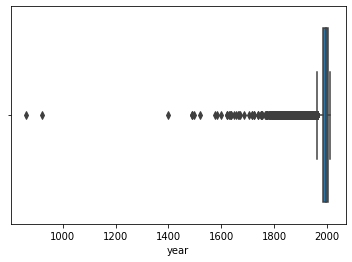

In [ ]:
# Student Action: Make a boxplot for the 'year' column in the 'correct_years_df' DataFrame.
sns.boxplot('year',data=correct_year_df)


The box representing the interquartile range appears expanded compared to the box in the previous boxplot. It also shows the median value is close to the third quartile value. Also, there are too many lower outliers as shown by the black dots.

---

#### Activity 4: Removing The Invalid `reclong` Values^

The longitude values go from
$-180^{\circ}$ to $180^{\circ}$
where positive values represent the eastward direction and the negative values represent the westward direction. The
$0^{\circ}$
longitude is called the prime meridian. Refer to the image below for more details.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/britannica_longitudes.jpg' width='800'>

*Image Credits: https://cdn.britannica.com/06/64906-050-675D6688/meridians-Facts-Lines-of-Longitude-angles-halves.jpg*

Now, let's remove the rows containing the `reclong` values greater than
$180^{\circ} $
and less than
$-180^{\circ}$
. But first, let's retrieve all the rows containing the `reclong` values less than or equal to
$ 180^{\circ} $

In [ ]:
# Student Action: Retrieve all the rows from the 'correct_years_df' DataFrame having the 'reclong' values less than or equal to 180 degrees.
correct_year_df[correct_year_df['reclong']<=180]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


So, there are 38,221 rows which have the `reclong` values less than or equal to
$180^{\circ}$
. Now, let's retrieve all the rows which have the `reclong` values greater than or equal to
$-180^{\circ}$

In [ ]:
# Student Action: Retrieve all the rows from the 'correct_years_df' DataFrame having the 'reclong' values greater than or equal to -180 degrees.
correct_year_df[correct_year_df['reclong']>=-180]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


So, there are 38,222 rows which have the `reclong` values greater than or equal to
$180^{\circ}$
. Now, let's combine both the conditions using the Ampersand (`&`) logical operator to combine the above two conditions.

In [ ]:
# Student Action: Retrieve all the rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df=correct_year_df[(correct_year_df['reclong']<=180) & (correct_year_df['reclong']>=-180)]
correct_long_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


So, there are 38,221 rows having the correct `reclong` values.

---

#### Activity 5: Removing The Rows Containing `0 N, 0 E` Values Using The Tilde (`~`) Operator^^^

There are also some rows which contain the `0 reclat` and `0 reclong` values. *It is also the point of intersection of the prime meridian and the Equator*. We need to remove such rows because this pair of coordinates represent the portion of the Atlantic Ocean near the west coast of Africa (refer to the image below) from where it is difficult to recover the fallen meteorites.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/zero_north_zero_east.png' width='500'>

Let's retrieve all the rows having the `0 reclat` and `0 reclong` values.

In [ ]:
# Student Action: Retrieve the rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df' DataFrame.
correct_long_df[(correct_long_df['reclat']==0) & (correct_long_df['reclong']==0)]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
596,Mason Gully,53653,Valid,H5,24.54,Fell,2010.0,0.0,0.0,"(0.000000, 0.000000)"
1648,Allan Hills 09004,52119,Valid,Howardite,221.70,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1649,Allan Hills 09005,55797,Valid,L5,122.30,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1650,Allan Hills 09006,55798,Valid,H5,104.30,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
1651,Allan Hills 09008,55799,Valid,H5,31.30,Found,2009.0,0.0,0.0,"(0.000000, 0.000000)"
...,...,...,...,...,...,...,...,...,...,...
45655,Yamato 984144,40764,Valid,H6,37.44,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"
45656,Yamato 984145,40765,Valid,L6,54.80,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"
45657,Yamato 984146,40766,Valid,H3,19.32,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"
45658,Yamato 984147,40767,Valid,LL6,118.90,Found,1998.0,0.0,0.0,"(0.000000, 0.000000)"


So, there are 6,185 rows containing the `0 reclat` and `0 reclong` values in the `correct_long_df`. Let's remove them using the tilde (`~`) operator.

The tilde operator denotes the negation of a condition. In other words, it converts the `True` value to `False` value and vice-versa.

In [ ]:
# Teacher Action: Get only the rows having the 'reclat' value equal to 0.


So, there are 6,409 rows having the `reclat` value equal to `0` in the `correct_long_df`. Now, let's get only the rows **NOT** having the `reclat` value equal to 0 using the tilde (or negation) operator.

In [ ]:
# Teacher Action: Get only the rows NOT having the 'reclat' value equal to 0. Use the tilde operator for this operation.


So, there are 31,812 rows in the `correct_long_df` **NOT** having the `reclat` value equal to `0`. Now, let's get the rows **neither** having the `reclat` value equal to 0 **nor** having the `reclong` value equal to `0` using the tilde (or negation) operator. Store the new DataFrame in the `correct_lat_long_df` variable.

We already know that there are 6,185 rows having both the `reclat` and `reclong` values equal to `0` in the `correct_long_df`. So, after removing these rows, we should have a total of (38,221 - 6,185 = 32,036) rows in the new DataFrame.

In [ ]:
# Teacher Action: Remove the rows containing the 0 'reclat' and 0 'reclong' values from the 'correct_long_df'.
correct_long_df[~((correct_long_df['reclat']==0) & (correct_long_df['reclong']==0))]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


As you can see, after the removal of the rows containing the unwanted `reclat` and `reclong` values, we have a new DataFrame containing 32,036 rows.

Let's check the percentage of values we have retained so far.

In [ ]:
# Student Action: Calculate the percentage of values retained in the new DataFrame from the 'met_df' DataFrame.
# Also, round-off the value to two digits after the decimal point.


So far we have retained the approx 70% of the values which is still quite a big dataset.

In the next class, we will learn about logical operations more so that you get comfortable with this concept because a large part of the data cleaning process involves applying the relevant logical operations. Afterwards, we will continue with data cleaning exercises.

---